In [24]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

rootPath = 'D:/deep-learning/input/cat_and_dog'


In [39]:
imageGenerator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range=[.2,.2],
                                    horizontal_flip=True,
                                    validation_split=.2)

In [40]:
trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                                  target_size=(64,64),
                                                  subset='validation')

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [32]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(64,64,3)))
model.add(layers.Conv2D(16,(3,3),(1,1),'same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [33]:
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping


opt = optimizers.Adam(lr=0.001)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy', 
    metrics=['acc'],
)


In [34]:
epochs = 32
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    callbacks=[es]
)

Epoch 1/32
226/225 [==============================] - 48s 211ms/step - loss: 0.6916 - acc: 0.5310 - val_loss: 0.6946 - val_acc: 0.5312
Epoch 2/32
226/225 [==============================] - 45s 200ms/step - loss: 0.6865 - acc: 0.5541 - val_loss: 0.6910 - val_acc: 0.5599
Epoch 3/32
226/225 [==============================] - 45s 198ms/step - loss: 0.6812 - acc: 0.5732 - val_loss: 0.6835 - val_acc: 0.5619
Epoch 4/32
226/225 [==============================] - 44s 196ms/step - loss: 0.6806 - acc: 0.5646 - val_loss: 0.6795 - val_acc: 0.6029
Epoch 5/32
226/225 [==============================] - 44s 196ms/step - loss: 0.6690 - acc: 0.5929 - val_loss: 0.6746 - val_acc: 0.5889
Epoch 6/32
226/225 [==============================] - 44s 196ms/step - loss: 0.6593 - acc: 0.6092 - val_loss: 0.6651 - val_acc: 0.6273
Epoch 7/32
226/225 [==============================] - 44s 196ms/step - loss: 0.6450 - acc: 0.6239 - val_loss: 0.6489 - val_acc: 0.6406
Epoch 8/32
226/225 [==============================] - 4

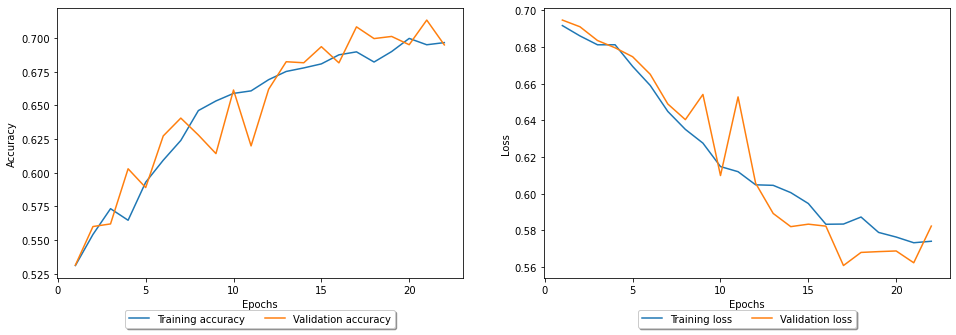

In [35]:
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 2))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))
    fig = plt.gcf()
    plt.show()
show_graph(history.history)

In [36]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

Found 2023 images belonging to 2 classes.


[0.5854870309121907, 0.6910529]

예측: 고양이
정답: 개


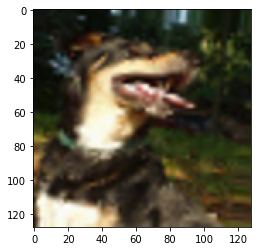

In [37]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

예측: 고양이
정답: 고양이


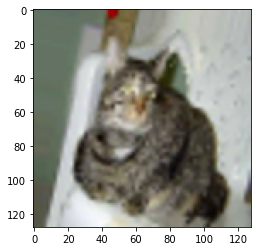

In [38]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

예측: 고양이
정답: 고양이


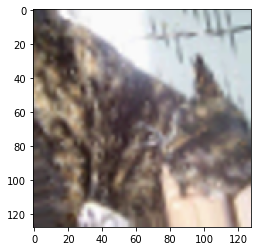

In [41]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

예측: 개
정답: 고양이


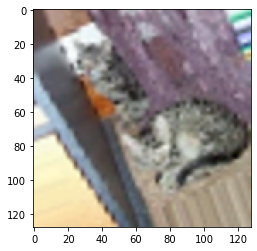

In [42]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

예측: 고양이
정답: 고양이


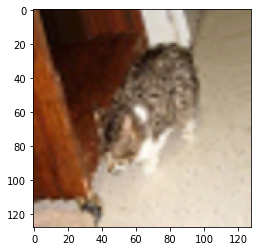

In [43]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))